In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.cross_validation import train_test_split
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import time
import datetime as dt

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

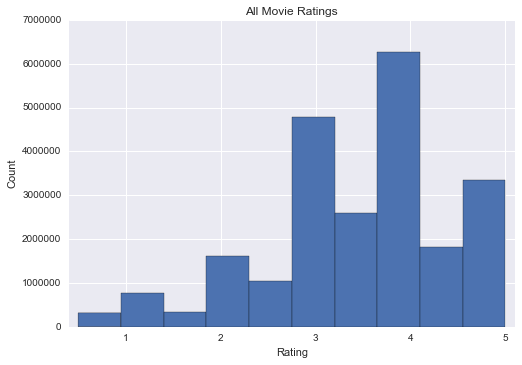

In [2]:
ratings = pd.DataFrame.from_csv('Full/ratings.csv',index_col=None)
movies = pd.DataFrame.from_csv('Full/movies.csv',index_col='movieId')
combined = pd.merge(ratings, movies.reset_index(), on='movieId')

temp = combined.drop_duplicates('title')
genres = []
for num in temp.index:
    text = temp.genres[num]
    while '|' in text:
        g,sep,text = text.partition('|')
        if g not in genres:
            genres.append(g)
    if text not in genres:
        genres.append(text)
    if len(genres) == 20:
        break
genres.sort()

plt.hist(combined.rating)
plt.xlim(0.4,5.1)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('All Movie Ratings')
genres

C:\Users\Somil\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


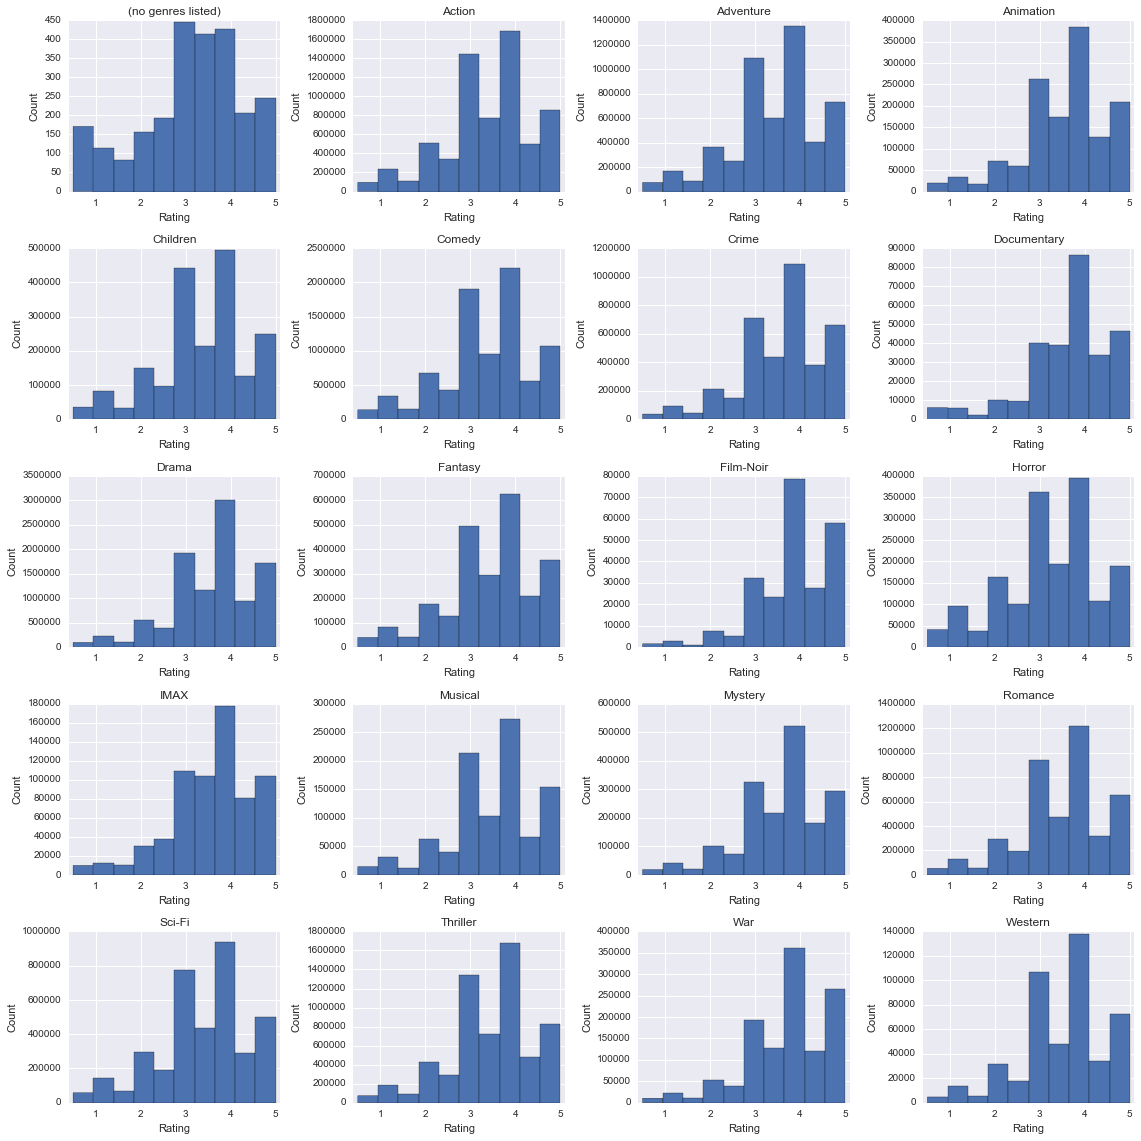

In [3]:
fig,axes = plt.subplots(nrows=5, ncols = 4, figsize = (16,16))

for num in range(0,axes.shape[0]):
    for num2 in range(0,axes.shape[1]):
        axes[num,num2].hist(combined[combined.genres.str.contains(genres[num*axes.shape[1] + num2])].rating)
        axes[num,num2].set_title(genres[num*axes.shape[1] + num2])
        axes[num,num2].set_xlim(0.4,5.1)
        axes[num,num2].set_xlabel('Rating')
        axes[num,num2].set_ylabel('Count')
        
fig.tight_layout()

datetime.datetime(2003, 2, 18, 21, 34, 27)

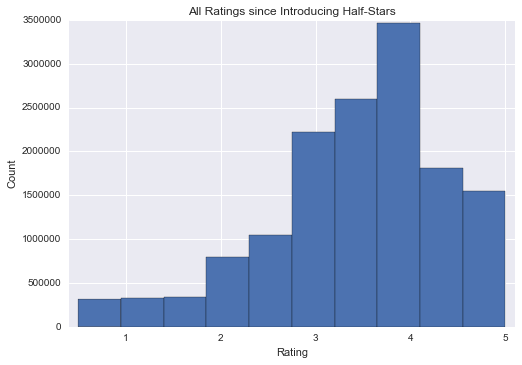

In [4]:
half_rating = combined[(combined.rating == 0.5)|(combined.rating == 1.5)|(combined.rating == 2.5)|(combined.rating == 3.5)|(combined.rating == 4.5)]
min_timestamp = np.min(half_rating.timestamp)

plt.hist(combined[combined.timestamp >= min_timestamp].rating)
plt.xlim(0.4,5.1)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('All Ratings since Introducing Half-Stars')
dt.datetime.utcfromtimestamp(min_timestamp)

C:\Users\Somil\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


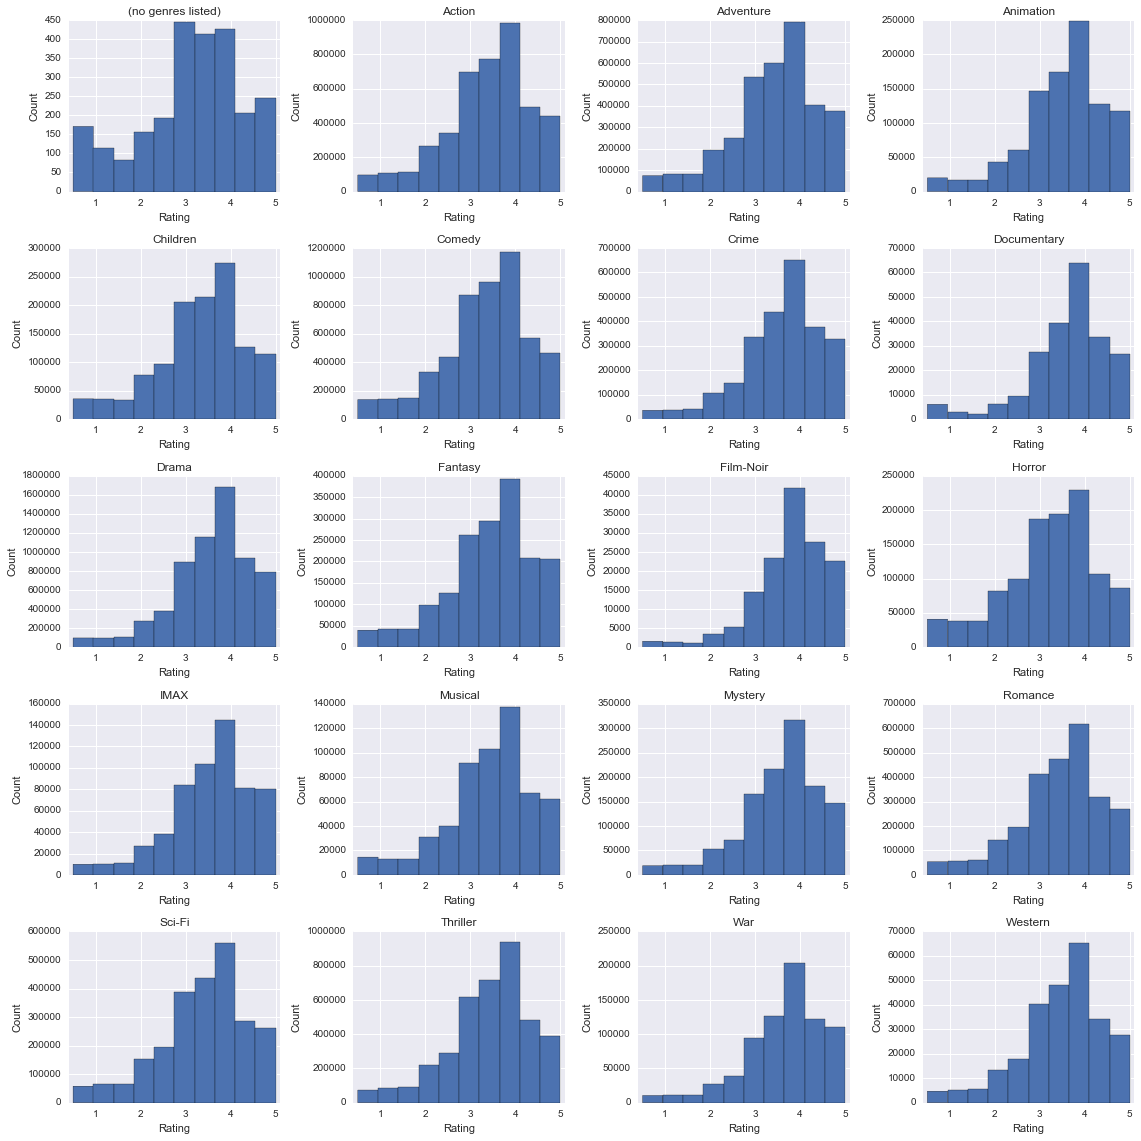

In [5]:
fig,axes = plt.subplots(nrows=5, ncols = 4, figsize = (16,16))

for num in range(0,axes.shape[0]):
    for num2 in range(0,axes.shape[1]):
        axes[num,num2].hist(combined[(combined.genres.str.contains(genres[num*axes.shape[1] + num2]))&(combined.timestamp>=min_timestamp)].rating)
        axes[num,num2].set_title(genres[num*axes.shape[1] + num2])
        axes[num,num2].set_xlim(0.4,5.1)
        axes[num,num2].set_xlabel('Rating')
        axes[num,num2].set_ylabel('Count')
        
fig.tight_layout()

In [6]:
genres.remove('(no genres listed)')
genres.remove('IMAX')

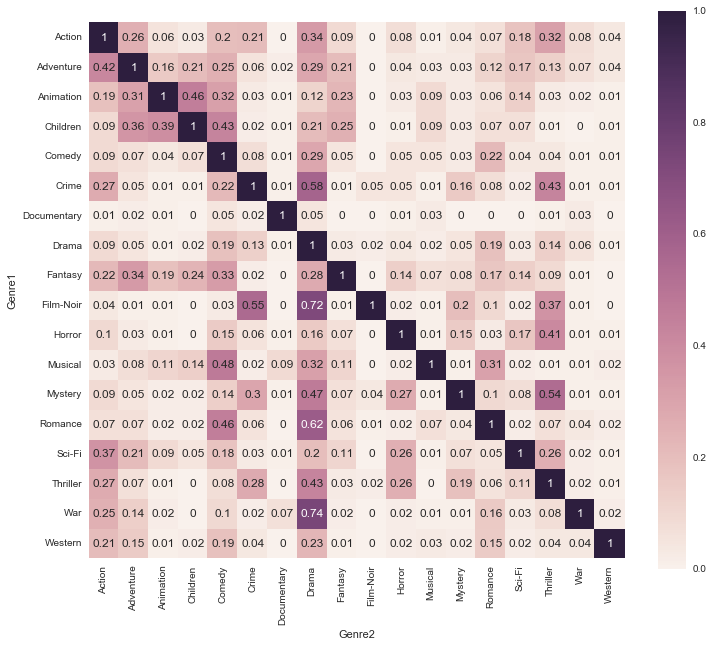

In [7]:
edge = []

for gen1 in range(0,len(genres)):
    for gen2 in range(0,len(genres)):
        edge.append({'Genre1': genres[gen1], 'Genre2': genres[gen2], '': len(movies[movies.genres.str.contains(genres[gen1])&movies.genres.str.contains(genres[gen2])])})
edge = pd.DataFrame(edge)
edge = edge.pivot('Genre1','Genre2','')
edge = np.round(edge/edge.max(),2).T
plt.figure(figsize=(12,10))
ax = seaborn.heatmap(edge, square=True, annot=True)
ax.set_ylabel('Genre1')
ax.set_xlabel('Genre2')
plt.show()

C:\Users\Somil\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Somil\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


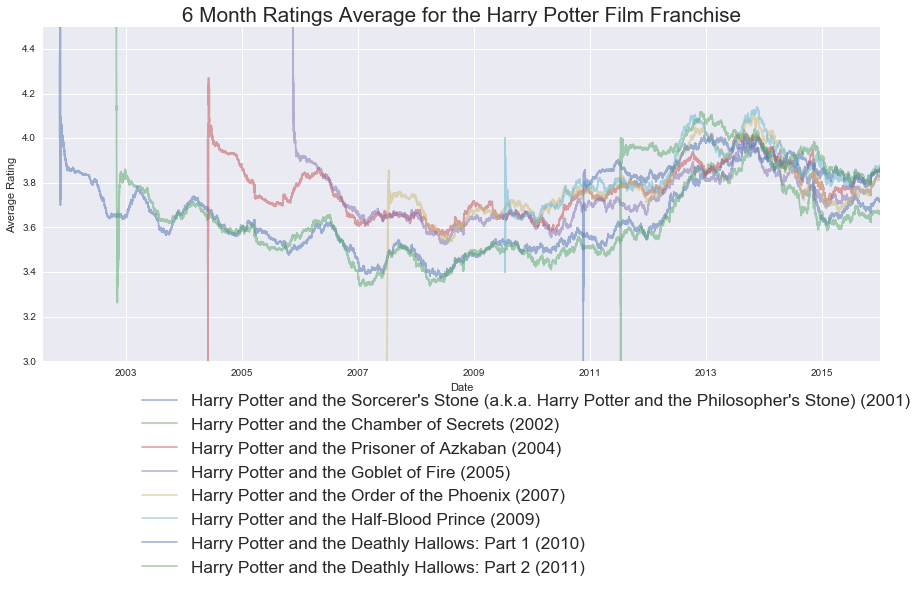

In [8]:
hp = [4896,5816,8368,40815,54001,69844,81834,88125]

fig,axes = plt.subplots(figsize=(15, 6))

for num in range(0,len(hp)):
    r = ratings[ratings.movieId == hp[num]]
    r['datetime'] = r.timestamp.apply(dt.datetime.utcfromtimestamp)
    r['date'] = r.datetime.apply(dt.datetime.date)
    r = r.drop(['userId','movieId','datetime'], axis = 1)
    r = r.sort_values('date')

    avg_latest = []
    for num2 in range(0,len(r)):
        last_six = r[(r.timestamp>=(r.timestamp[r.index[num2]]-15552000)) & (r.timestamp <= r.timestamp[r.index[num2]])]
        avg_latest.append(np.mean(last_six.rating))

    r['latest_ratings'] = avg_latest

    axes.plot_date(r.date,r.latest_ratings,fmt='-', alpha=0.5, label = movies.loc[hp[num]].title)
axes.set_ylim(3,4.5)
axes.set_xlim('8/1/2001','1/1/2016')
axes.set_title("6 Month Ratings Average for the Harry Potter Film Franchise",fontsize='xx-large')
axes.set_xlabel('Date')
axes.set_ylabel('Average Rating')
plt.legend(bbox_to_anchor=(0.1, -0.05),loc=2,fontsize='x-large')

C:\Users\Somil\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Somil\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


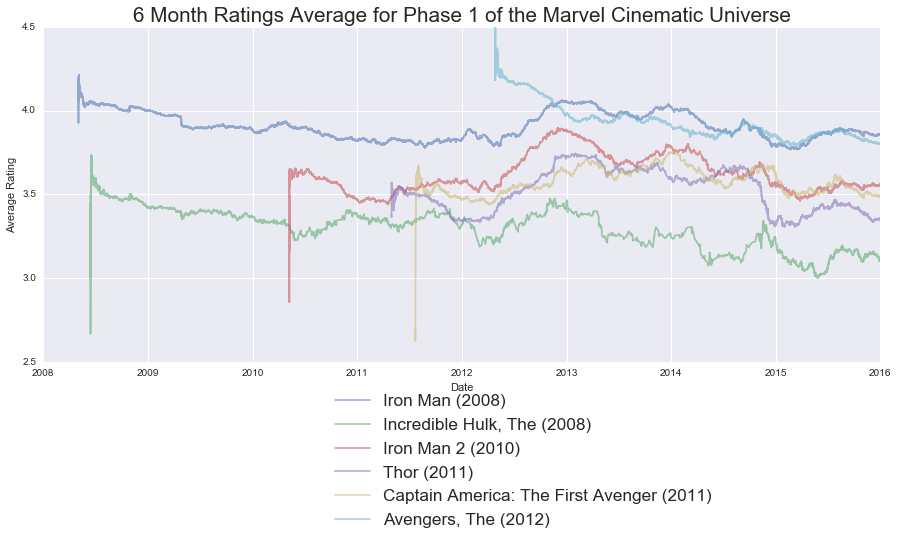

In [9]:
mcu = [59315,60040,77561,86332,88140,89745]

fig,axes = plt.subplots(figsize=(15, 6))

for num in range(0,len(mcu)):
    r = ratings[ratings.movieId == mcu[num]]
    r['datetime'] = r.timestamp.apply(dt.datetime.utcfromtimestamp)
    r['date'] = r.datetime.apply(dt.datetime.date)
    r = r.drop(['userId','movieId','datetime'], axis = 1)
    r = r.sort_values('date')

    avg_latest = []
    for num2 in range(0,len(r)):
        last_six = r[(r.timestamp>=(r.timestamp[r.index[num2]]-15552000)) & (r.timestamp <= r.timestamp[r.index[num2]])]
        avg_latest.append(np.mean(last_six.rating))

    r['latest_ratings'] = avg_latest

    axes.plot_date(r.date[5:],r.latest_ratings[5:],fmt='-', alpha=0.55, label=movies.loc[mcu[num]].title)
axes.set_ylim(2.5,4.5)
axes.set_xlim('1/1/2008','1/1/2016')
axes.set_title("6 Month Ratings Average for Phase 1 of the Marvel Cinematic Universe",fontsize='xx-large')
axes.set_xlabel('Date')
axes.set_ylabel('Average Rating')
plt.legend(bbox_to_anchor=(0.33, -0.05), loc= 2, fontsize = 'x-large')